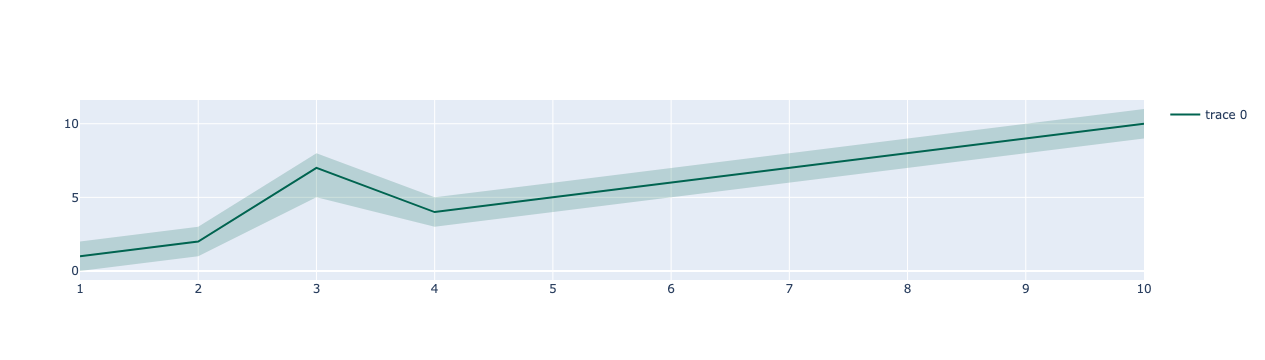

In [1]:

import plotly.graph_objs as go

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 7, 4, 5, 6, 7, 8, 9, 10]
y_upper = [2, 3, 8, 5, 6, 7, 8, 9, 10, 11]
y_lower = [0, 1, 5, 3, 4, 5, 6, 7, 8, 9]


fig = go.Figure([
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])
fig.show()

In [2]:
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

fig = go.Figure([
    go.Scatter(
        name='Measurement',
        x=df['Time'],
        y=df['10 Min Sampled Avg'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=df['Time'],
        y=df['10 Min Sampled Avg']+df['10 Min Std Dev'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df['Time'],
        y=df['10 Min Sampled Avg']-df['10 Min Std Dev'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='Wind speed (m/s)',
    title='Continuous, variable value error bars',
    hovermode="x"
)
fig.show()

URLError: <urlopen error [Errno 61] Connection refused>

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-05-26 18:21:12--  https://lazyprogrammer.me/course_files/airline_passengers.csv
正在解析主机 lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
正在连接 lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... 已连接。
^C


In [3]:
import pandas as pd
import numpy as np
import pmdarima as pm
df = pd.read_csv("airline_passengers.csv", index_col = "Month", parse_dates = True)
df['LogPassengers'] = np.log(df['Passengers'])

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [4]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
model = pm.auto_arima(
    train['Passengers'],
    trace = True,
    suppress_warnings = True,
    seasonal = True, 
    m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.55 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.11 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.24 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.18 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [6]:
info = model.summary()
html_info = info.as_html()

In [7]:
info

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sat, 28 May 2022   AIC                            905.686
Time:                                    12:57:57   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

In [17]:
test['Prediction'] = test_pred
test['LowerBound'] = confint[:,0]
test['UpperBound'] = confint[:,1]

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/1129447381.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/1129447381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/1129447381.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [47]:
test["Observation"] = test['Passengers']

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/1418121270.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



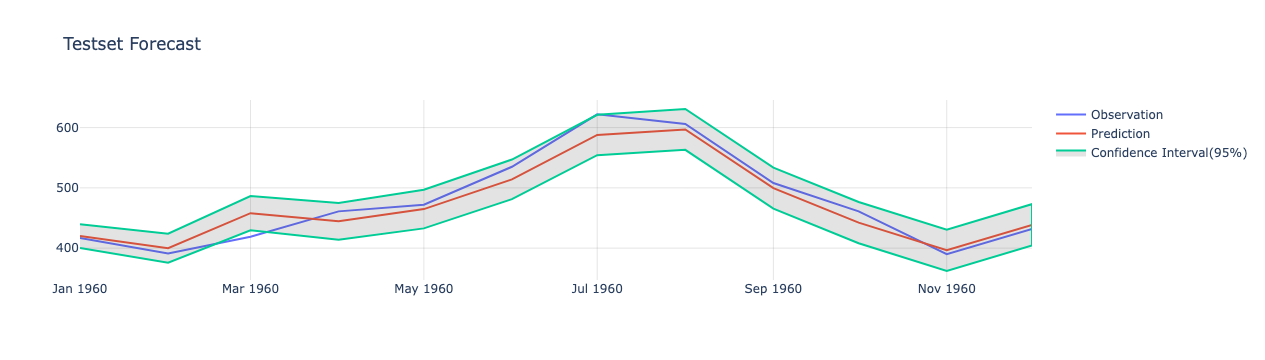

In [62]:
import plotly.express as px

fig = go.Figure(
        [
        # show predictions
        go.Scatter(
        x = test.index,
        y = test.Observation,
        mode = 'lines',
        name = "Observation"), 
        
        # show actual data values
        go.Scatter(
        x = test.index,
        y = test.Prediction,
        mode = 'lines',
        name = "Prediction"), 
        ]
)

dataset_name = 'Passengers'

y_upper = test.UpperBound
y_lower = test.LowerBound

fig.add_trace(go.Scatter(
        x=np.concatenate([test.index, test.index[::-1]]),
        y=pd.concat([y_upper, y_lower[::-1]]),
        fill='toself',
        hoveron='points',
        name="Confidence Interval(95%)",
        fillcolor='rgba(68, 68, 68, 0.15)',
        )
)

fig.update_layout(
        {
        'title': {"text":"Testset Forecast"},
        'plot_bgcolor':"white"
        })

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(127,127,128,0.2)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(127,127,128,0.2)')
fig.show()

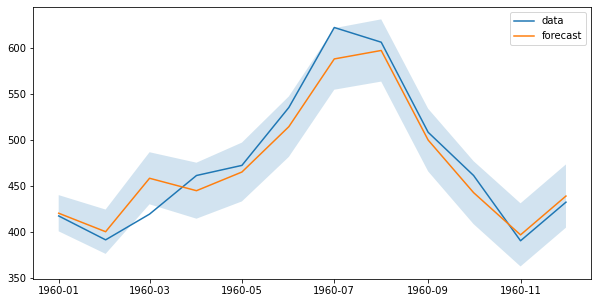

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(test.index, test['Passengers'], label = 'data')
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], alpha = 0.2)
ax.legend()

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/1602217542.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
train.head(20)

,Passengers,LogPassengers,Observation,Prediction
Month,,,,
1949-01-01,112,4.718499,112,30.552454
1949-02-01,118,4.770685,118,30.572951
1949-03-01,132,4.882802,132,30.592460
1949-04-01,129,4.859812,129,30.611639
1949-05-01,121,4.795791,121,30.626824
1949-06-01,135,4.905275,135,30.636896
1949-07-01,148,4.997212,148,30.648454
1949-08-01,148,4.997212,148,30.661250
1949-09-01,136,4.912655,136,30.671743


/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/3064356571.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jh/q3qgwx4n59b_rg88dkbcb20m0000gn/T/ipykernel_34011/3064356571.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



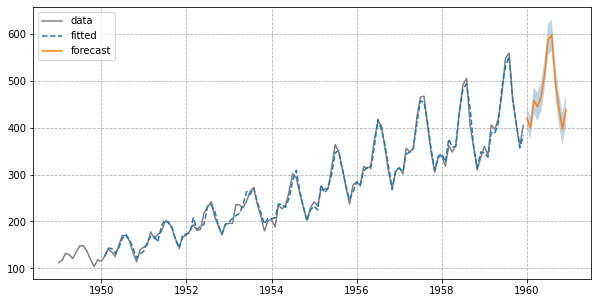

In [69]:
train['Observation'] = train['Passengers']
train_pred = model.predict_in_sample(start = 0, end = -1)
train['Prediction'] = train_pred

fig, ax = plt.subplots(figsize = (10,5))
ax.plot(train.index, train['Observation'], label = 'data', color = 'gray')
ax.plot(train.index[12 + 1:], train_pred[12 + 1:], label = 'fitted', linestyle = "--")
ax.plot(test.index, test_pred, label = 'forecast')
ax.fill_between(test.index, confint[:,0], confint[:,1], alpha = 0.3)
plt.grid(linestyle='--')
ax.legend()

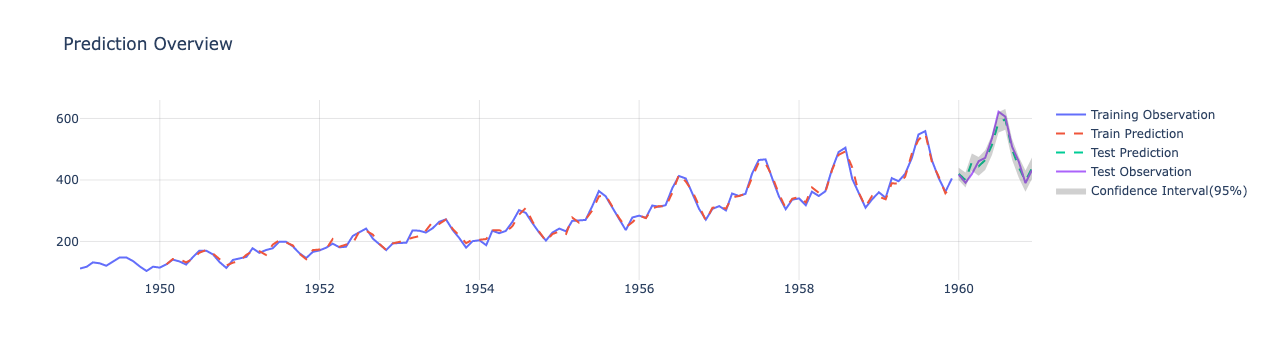

In [90]:
seasonal = 12

fig = go.Figure([
    go.Scatter(
        x = train.index,
        y = train.Observation,
        name = "Training Observation"
    ),
    go.Scatter(
        x = train.iloc[seasonal + 1:,: ].index,
        y = train.iloc[seasonal + 1:,: ].Prediction,
        name = "Train Prediction",
        line = dict(dash = "dash")
    ),
    go.Scatter(
        x = test.index,
        y = test.Prediction,
        mode = 'lines',
        line = dict(dash = "dash"),
        name = "Test Prediction"), 
    
    go.Scatter(
        x = test.index,
        y = test.Observation,
        mode = 'lines',
        name = "Test Observation")
    
    ]
     
)

fig.add_trace(go.Scatter(
        x=np.concatenate([test.index, test.index[::-1]]),
        y=pd.concat([y_upper, y_lower[::-1]]),
        fill='toself',
        hoveron='points',
        name="Confidence Interval(95%)",
        fillcolor='rgba(68, 68, 68, 0.25)',
        line_color = "rgba(0,0,0,0)"
        )
)

fig.update_layout(
        {
        'title': {"text":"Prediction Overview"},
        'plot_bgcolor':"white"
        })

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(127,127,128,0.2)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(127,127,128,0.2)')

In [46]:
import numpy as np

class CustomeModel:
    def __init__(self, alpha, beta, tau):
        self.alpha = alpha
        self.beta = beta
        self.lmbd = 1.7932821084566097 / tau
        
    def fraction_term(self, t):
        return (1 - np.exp(-self.lmbd * t)) / (self.lmbd * t)
        
    def alpha_term(self, t):
        return self.alpha * self.fraction_term(t)
    
    def beta_term(self,t):
        return self.beta * (self.fraction_term(t) - np.exp(-self.lmbd * t))
    
    def predict(self, t):
        return self.alpha - self.alpha_term(t) + self.beta_term(t)

In [49]:
import matplotlib.pyplot as plt

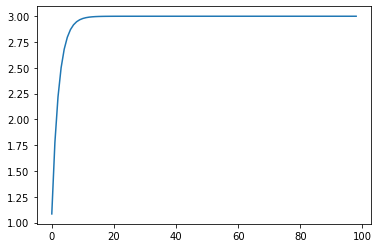

In [55]:
model = CustomeModel(3,3,4)

steps = np.arange(1,100,1)

plt.plot(model.predict(steps))

In [103]:
from dataset import get_airline
import datetime
from dateutil import relativedelta
nextmonth = datetime.datetime.now() + relativedelta.relativedelta(months=1)

datetime.datetime(2022, 6, 28, 22, 3, 15, 582610)

In [115]:
np.linspace(0,20,100)

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [138]:
from datetime import timedelta
df = get_airline()
periods= 20

days = np.arange(0,30 * periods, dtype = int)
t = days / 30
dates = [df.index[-1] + timedelta(days = int(i)) for i in days]

In [144]:
predict_df = pd.DataFrame(zip(t, dates), columns = ['step','date'])

In [151]:
df['Passengers'].std()

119.96631694294321

In [145]:
predict_df

,step,date
0,0.000000,1960-12-01
1,0.033333,1960-12-02
2,0.066667,1960-12-03
3,0.100000,1960-12-04
4,0.133333,1960-12-05
...,...,...
595,19.833333,1962-07-19
596,19.866667,1962-07-20
597,19.900000,1962-07-21
598,19.933333,1962-07-22


In [ ]:
method = st.radio("Choose fitting Method",("OSL","Manual"))

In [166]:
calibrate_ns_ols?

Signature: calibrate_ns_ols(t: numpy.ndarray, y: numpy.ndarray, tau0: float = 2.0) -> Tuple[nelson_siegel_svensson.ns.NelsonSiegelCurve, Any]
Docstring:
Calibrate a Nelson-Siegel curve to time-value pairs
t and y, by optimizing tau and chosing all betas
using ordinary least squares.
File:      /opt/anaconda3/lib/python3.8/site-packages/nelson_siegel_svensson/calibrate.py
Type:      function


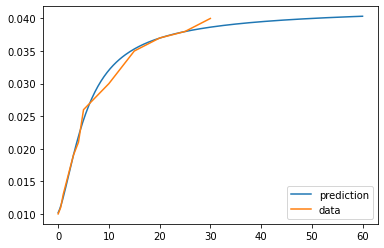

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

t = np.array([0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0])
y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04])

curve, status = calibrate_ns_ols(t, y, tau0 = 1.0)
assert status.success
predt = np.linspace(0,60,200)
pred = curve(predt)
plt.plot(predt,pred, label = 'prediction')
plt.plot(t, y, label = 'data')
plt.legend(loc = 'lower right')

In [175]:
curve.beta0
curve.beta1
curve.beta2
curve.tau

1.7170971986454078

In [170]:
curve

NelsonSiegelCurve(beta0=0.042017393692347776, beta1=-0.031829031352259264, beta2=-0.02679732086122688, tau=1.7170971986454078)

In [26]:
from dataset import get_airline
import pmdarima as pm


df = get_airline()

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

arima = pm.auto_arima(
    train['Passengers'],
    trace = True,
    suppress_warnings = True,
    seasonal = True, 
    m = 12
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.55 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.22 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [29]:
arima_pred, confint = arima.predict(n_periods = Ntest, return_conf_int = True)

In [30]:
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve
import numpy as np

beta= -20
neilson_parameter_ui = {
            "beta0": beta,
            "beta1": -beta,
            "beta2": -0.04,
            "beta3": 0,
            "tau1": 1.1,
            "tau2": 4
        }

nelson = NelsonSiegelSvenssonCurve(**neilson_parameter_ui)
nelson_pred = nelson(np.arange(0, Ntest))

/opt/anaconda3/lib/python3.8/site-packages/nelson_siegel_svensson/nss.py:44: RuntimeWarning: invalid value encountered in true_divide
  factor1 = (1 - exp_tt1) / (T / tau1)
/opt/anaconda3/lib/python3.8/site-packages/nelson_siegel_svensson/nss.py:46: RuntimeWarning: invalid value encountered in true_divide
  factor3 = (1 - exp_tt2) / (T / tau2) - exp_tt2


In [21]:
import matplotlib.pyplot as plt

In [24]:
arima_test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)

AttributeError: 'NelsonSiegelSvenssonCurve' object has no attribute 'predict'

In [38]:
starting = df.shape[0] - Ntest

In [45]:
with open("arima.pkl",'rb') as f:
    pickle.load(f)

In [44]:
import pickle
with open("arima.pkl",'wb') as f:
    pickle.dump(arima, f)

[]

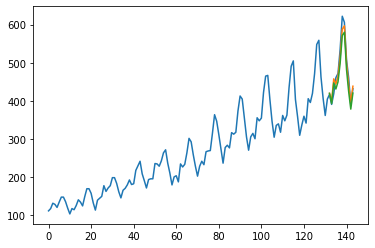

In [42]:
plt.plot(np.arange(0, len(df)), df['Passengers'])
plt.plot(np.arange(starting, starting + Ntest), arima_pred)
plt.plot(np.arange(starting, starting + Ntest), arima_pred + nelson_pred)
plt.plot()